#### Project Type: EDA
### Project Number: 0011
## Project Title: СберМаркет

----

# **STAGE 3. PRELIMINARY EXPLORATORY DATA ANALYSIS**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') 

### Import Data

---

In [2]:
# Путь к данным
data_path = r'D:/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

# data_path = r'/media/ruslan/Data/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

In [3]:
# Загрузка набора данных orders
orders = pd.read_feather(data_path + '/orders.file')

# Проверка результата 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334245 entries, 0 to 334244
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  334245 non-null  int64         
 1   user_id             334245 non-null  int64         
 2   total_cost          334245 non-null  float64       
 3   cost                334245 non-null  float64       
 4   item_total          334245 non-null  int64         
 5   promo_total         334245 non-null  float64       
 6   total_weight        334245 non-null  int64         
 7   total_quantity      334245 non-null  int64         
 8   state               334245 non-null  object        
 9   shipped_at          334245 non-null  datetime64[ns]
 10  created_at          334245 non-null  datetime64[ns]
 11  ship_address_id     334245 non-null  int64         
 12  store_id            334245 non-null  int64         
 13  delivery_window_id  334244 no

In [4]:
# Загрузка набора данных delivery_windows
delivery_windows = pd.read_feather(data_path + '/delivery_windows.file')

# Проверка результата 
delivery_windows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386157 entries, 0 to 386156
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   store_id   386157 non-null  int64         
 1   id         386157 non-null  int64         
 2   starts_at  386157 non-null  datetime64[ns]
 3   ends_at    386157 non-null  datetime64[ns]
 4   time_zone  386157 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 14.7+ MB


In [5]:
# Загрузка набора данных stores
stores = pd.read_feather(data_path + '/stores.file')

# Проверка результата 
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           41 non-null     int64
 1   city         41 non-null     int64
 2   retailer_id  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [6]:
# Загрузка набора данных addresses
addresses = pd.read_feather(data_path + '/addresses.file')

# Проверка результата 
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834883 entries, 0 to 834882
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   lat       834883 non-null  float64
 1   lon       834883 non-null  float64
 2   id        834883 non-null  int64  
 3   elevator  209818 non-null  object 
 4   floor     834883 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.8+ MB


In [7]:
# Загрузка набора данных replacements
replacements = pd.read_feather(data_path + '/replacements.file')

# Проверка результата 
replacements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328318 entries, 0 to 328317
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  328318 non-null  int64 
 1   item_id   328318 non-null  int64 
 2   state     328318 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.5+ MB


In [8]:
# Загрузка набора данных orders
cancellations = pd.read_feather(data_path + '/cancellations.file')

# Проверка результата 
cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507208 entries, 0 to 507207
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  507208 non-null  int64 
 1   item_id   507208 non-null  int64 
 2   state     507208 non-null  object
dtypes: int64(2), object(1)
memory usage: 11.6+ MB



## SECTION 3.1 RESEARCH

### _Descriptive Statistics_

---

In [9]:
# orders
orders.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,334245.0,4188268.77,658829.21,557.0,3634639.0,4134595.0,4745424.0,5513202.0
user_id,334245.0,177843.37,130990.12,31.0,84872.0,146590.0,243751.0,682383.0
total_cost,334245.0,189.07,175.35,-298.0,0.0,199.0,299.0,9500.0
cost,334245.0,257.83,172.49,0.0,199.0,299.0,299.0,9500.0
item_total,334245.0,4917.52,5526.47,0.0,2566.0,3873.0,5806.0,480746.0
promo_total,334245.0,-66.52,304.92,-39899.3,0.0,0.0,0.0,0.0
total_weight,334245.0,26925.79,41873.07,0.0,9685.0,18180.0,31935.0,3864000.0
total_quantity,334245.0,44.19,75.05,0.0,18.0,31.0,50.0,7728.0
ship_address_id,334245.0,1388983.29,610806.10,6017.0,853173.0,1333773.0,1890743.0,2669705.0
store_id,334245.0,23.19,29.69,1.0,8.0,11.0,21.0,120.0


In [10]:
# delivery_windows
delivery_windows.describe()

,store_id,id
count,386157.000000,386157.000000
mean,23.560236,371193.815676
std,29.906762,165270.088535
min,1.000000,75244.000000
25%,8.000000,231661.000000
50%,12.000000,375157.000000
75%,21.000000,516330.000000
max,120.000000,638550.000000


In [11]:
# stores
stores.describe()

,id,city,retailer_id
count,41.000000,41.000000,41.000000
mean,80.390244,5.170732,4.487805
std,50.339784,5.347441,5.143549
min,1.000000,1.000000,1.000000
25%,21.000000,1.000000,1.000000
50%,91.000000,2.000000,1.000000
75%,113.000000,8.000000,8.000000
max,163.000000,23.000000,16.000000


In [12]:
# addresses
addresses.describe()

,lat,lon,id
count,834883.000000,834883.000000,8.348830e+05
mean,55.608755,40.408734,1.776573e+06
std,0.622259,6.931451,8.720135e+05
min,0.000000,0.000000,6.017000e+03
25%,55.669769,37.540974,1.022866e+06
50%,55.751907,37.625463,1.668424e+06
75%,55.811812,37.778325,2.458415e+06
max,60.104650,104.209236,3.589814e+06


In [13]:
# replacements
replacements.describe()

,order_id,item_id
count,3.283180e+05,3.283180e+05
mean,4.128147e+06,1.471189e+07
std,6.187992e+05,6.135141e+06
min,5.570000e+02,5.332717e+06
25%,3.633992e+06,9.464135e+06
50%,4.026804e+06,1.354014e+07
75%,4.570098e+06,1.937501e+07
max,5.513202e+06,2.817826e+07


In [14]:
# cancellations
cancellations.describe()

,order_id,item_id
count,5.072080e+05,5.072080e+05
mean,4.068675e+06,1.410295e+07
std,6.177214e+05,6.090858e+06
min,5.570000e+02,5.331852e+06
25%,3.587240e+06,9.079415e+06
50%,3.962844e+06,1.295931e+07
75%,4.493439e+06,1.851225e+07
max,5.512004e+06,2.817953e+07


### _Distribution of data_

---

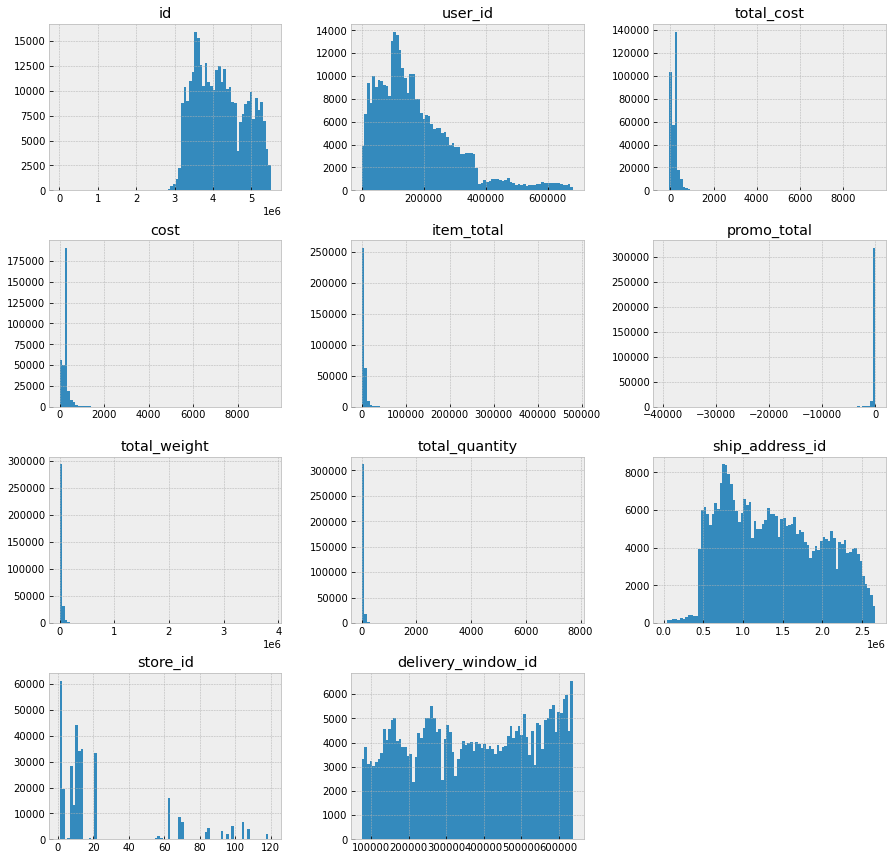

In [15]:
# Гистограмма распределения значений 
orders.hist(bins=80, figsize=(15,15))
plt.show()

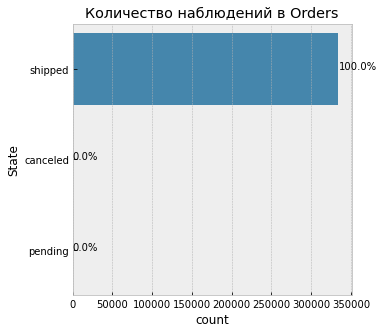

In [16]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(y=orders.state, order = orders.state.value_counts().index);
ax.set_title('Количество наблюдений в Orders');
ax.set(ylabel='State')

total = len(orders['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

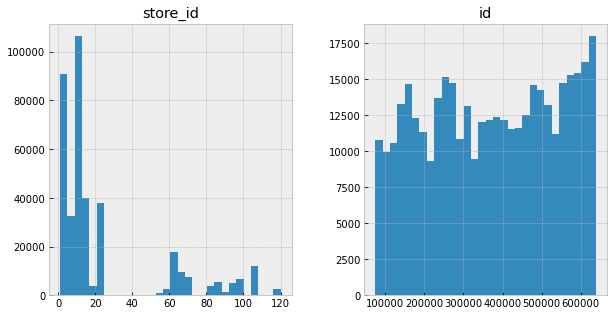

In [17]:
# Гистограмма распределения значений 
delivery_windows.hist(bins=30, figsize=(10,5))
plt.show()

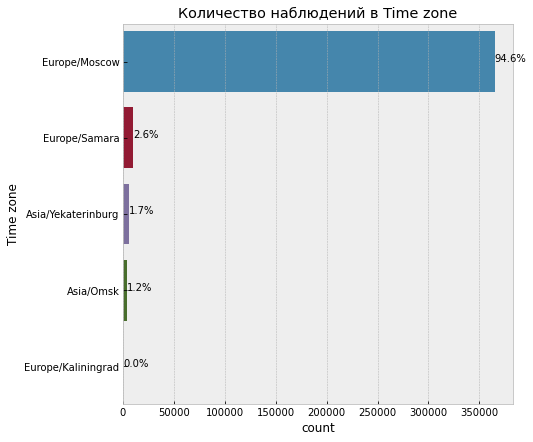

In [18]:
# Количество наблюдений в номинальной переменной 
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=delivery_windows.time_zone, order = delivery_windows.time_zone.value_counts().index);
ax.set_title('Количество наблюдений в Time zone');
ax.set(ylabel='Time zone')

total = len(delivery_windows['time_zone'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

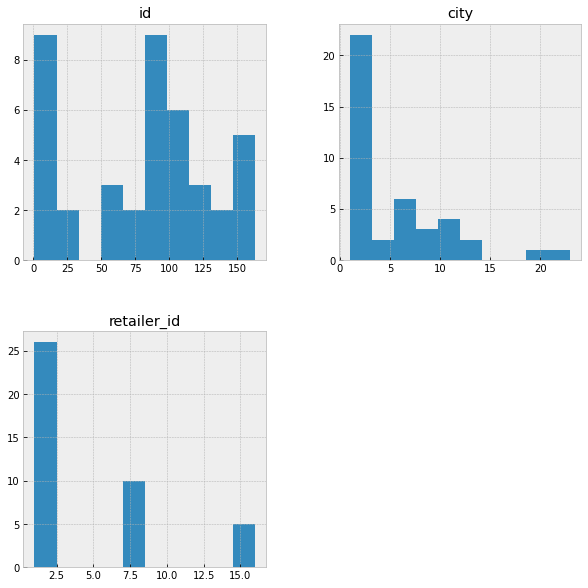

In [19]:
# Гистограмма распределения значений 
stores.hist(bins=10, figsize=(10,10))
plt.show()

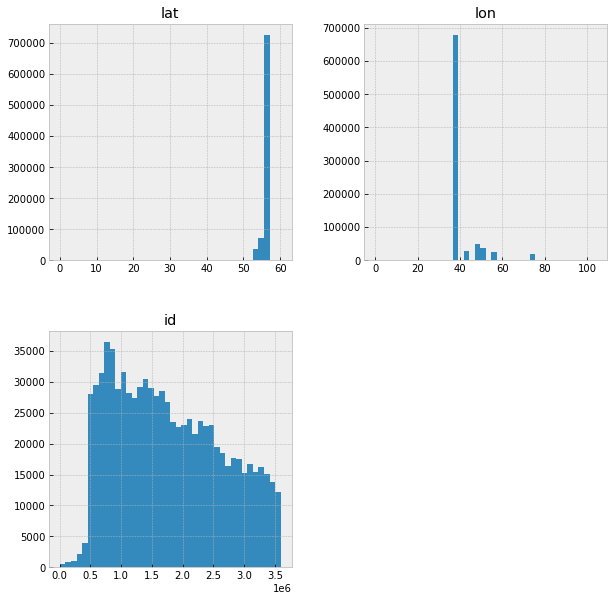

In [20]:
# Гистограмма распределения значений 
addresses.hist(bins=40, figsize=(10,10))
plt.show()

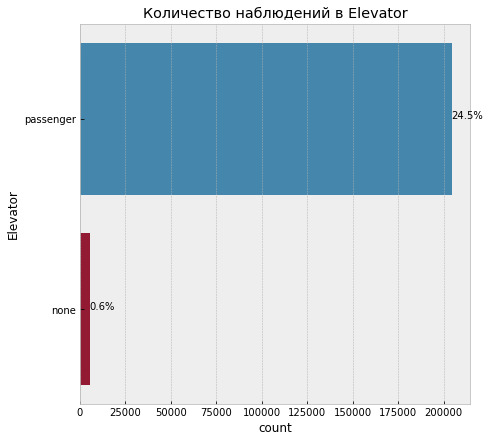

In [21]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=addresses.elevator, order = addresses.elevator.value_counts().index);
ax.set_title('Количество наблюдений в Elevator');
ax.set(ylabel='Elevator')

total = len(addresses['elevator'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

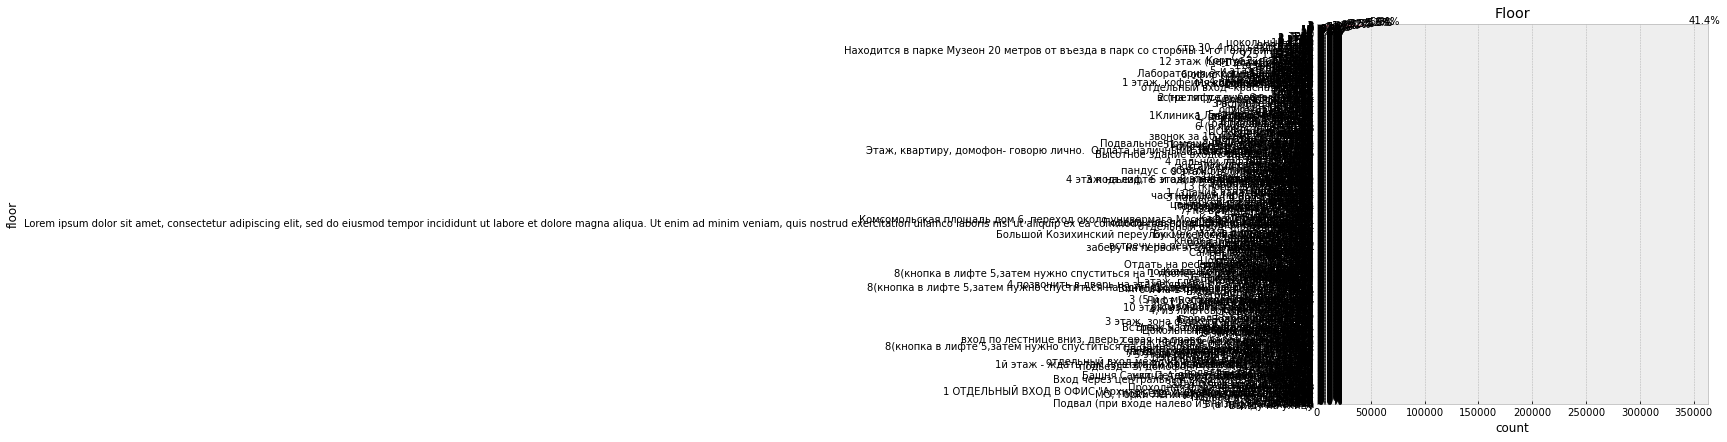

In [22]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=addresses.floor, order = addresses.floor.value_counts().index);
ax.set_title('Floor');


total = len(addresses['floor'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

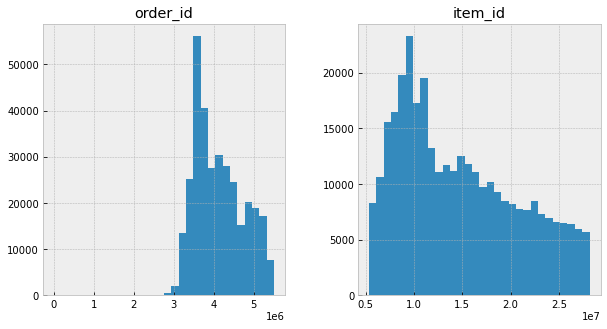

In [23]:
# Гистограмма распределения значений 
replacements.hist(bins=30, figsize=(10,5))
plt.show()

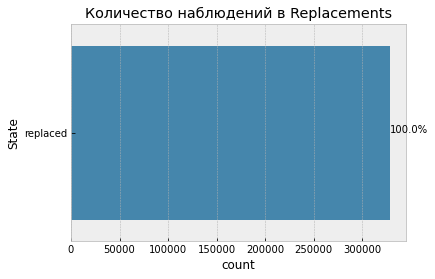

In [24]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots()
sns.countplot(y=replacements.state, order = replacements.state.value_counts().index);
ax.set_title('Количество наблюдений в Replacements');
ax.set(ylabel='State')

total = len(replacements['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

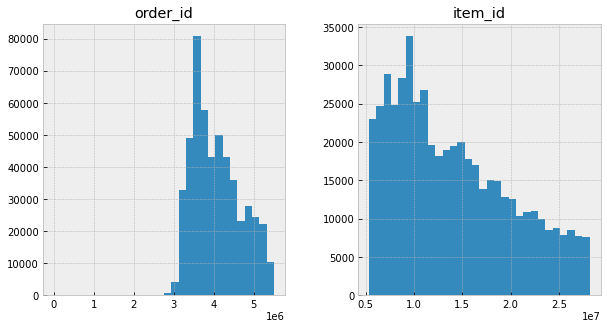

In [25]:
# Гистограмма распределения значений 
cancellations.hist(bins=30, figsize=(10,5))
plt.show()

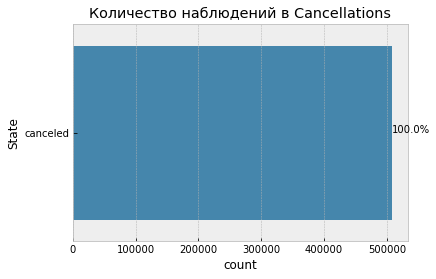

In [26]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots()
sns.countplot(y=cancellations.state, order = cancellations.state.value_counts().index);
ax.set_title('Количество наблюдений в Cancellations');
ax.set(ylabel='State')

total = len(cancellations['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

### _Outliers detection_

---

<AxesSubplot:>

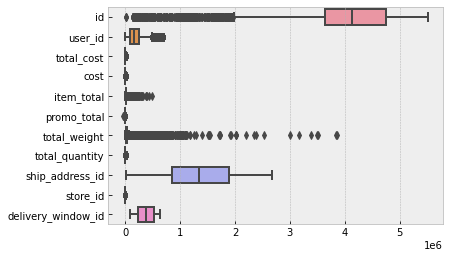

In [27]:
sns.boxplot(data = orders, orient='h')

<AxesSubplot:>

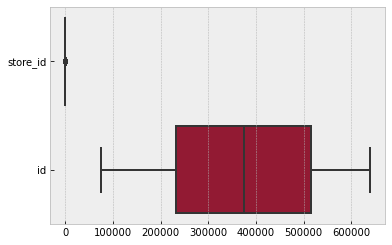

In [28]:
sns.boxplot(data = delivery_windows, orient='h')

<AxesSubplot:>

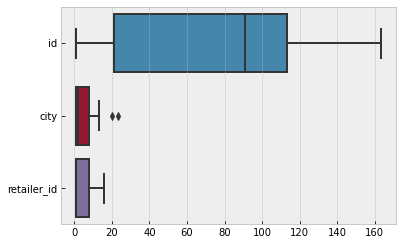

In [29]:
sns.boxplot(data = stores, orient='h')

<AxesSubplot:>

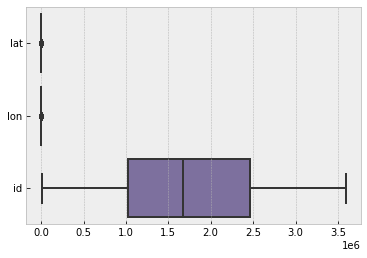

In [30]:
sns.boxplot(data = addresses, orient='h')

<AxesSubplot:>

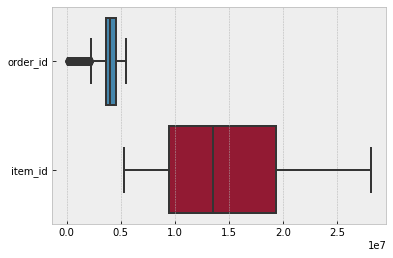

In [31]:
sns.boxplot(data = replacements, orient='h')

### _Exploring Relationships_

---

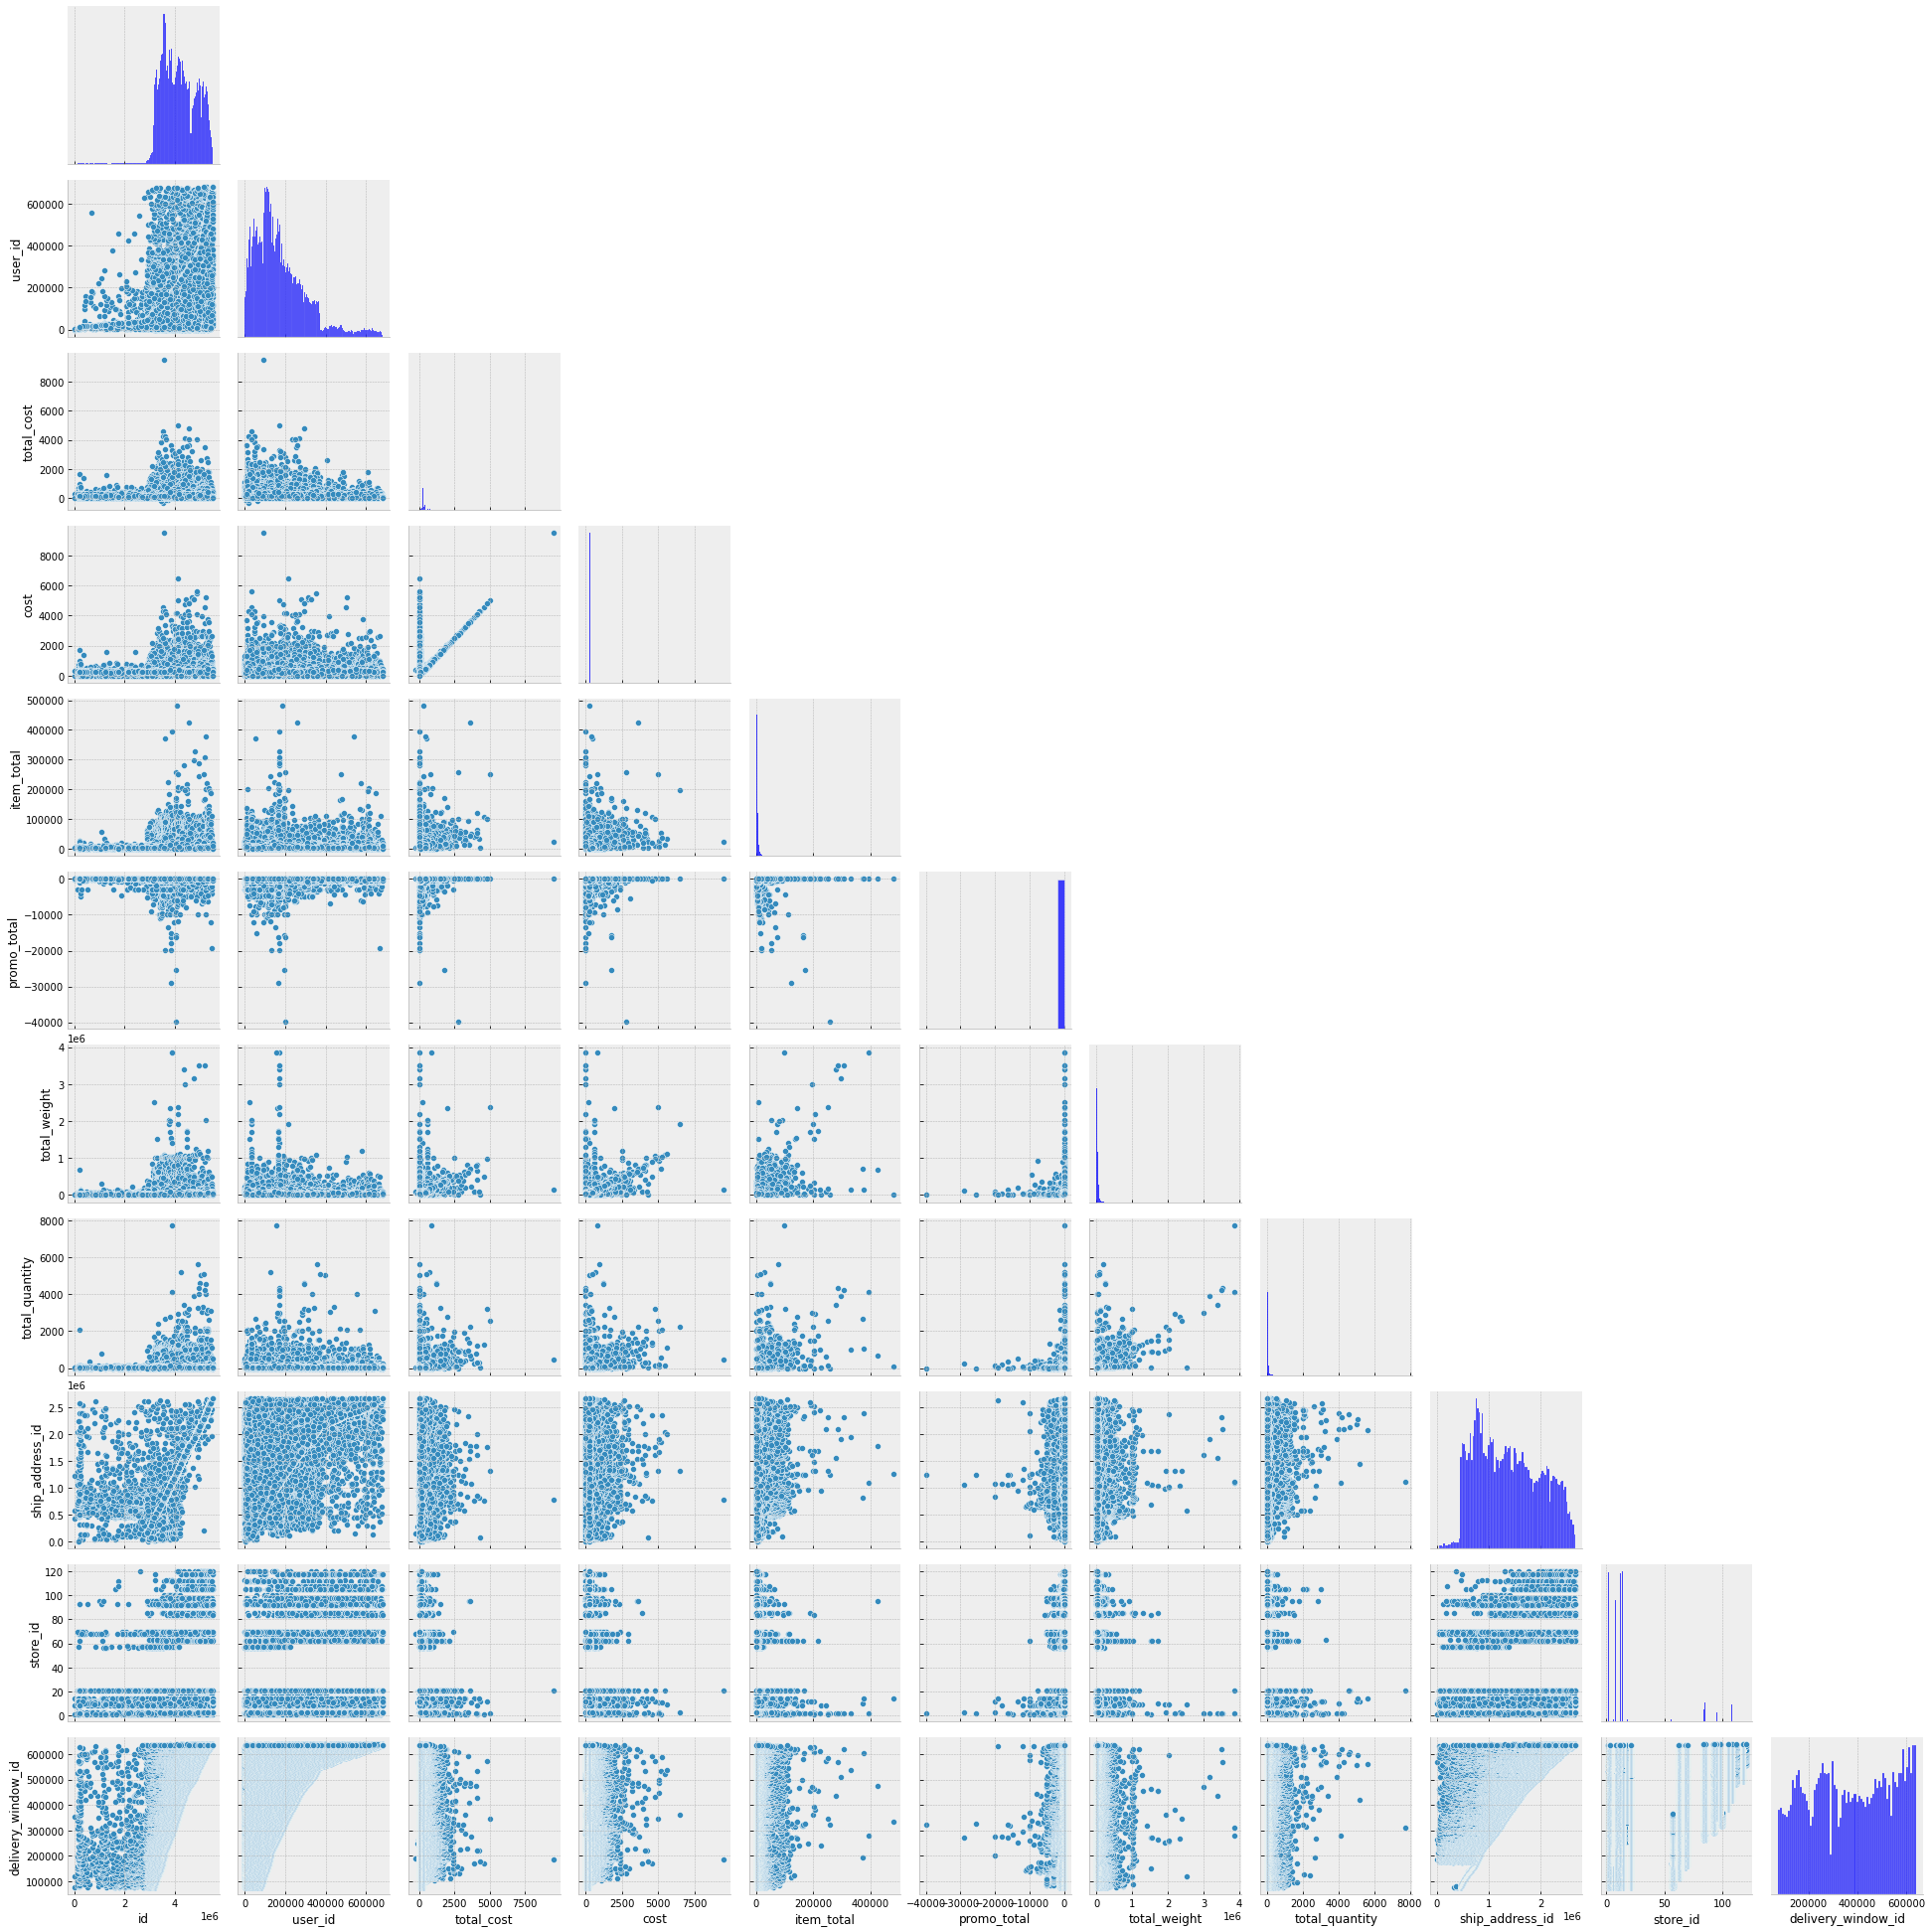

In [32]:
# Взаимоотношения между переменными 
sns.pairplot(data = orders, corner=True)

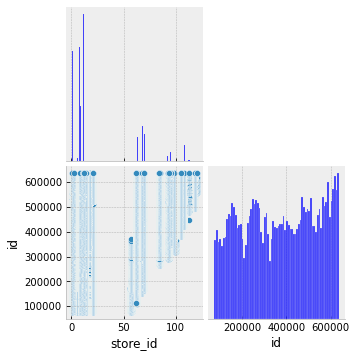

In [33]:
# Взаимоотношения между переменными 
sns.pairplot(data = delivery_windows, corner=True)

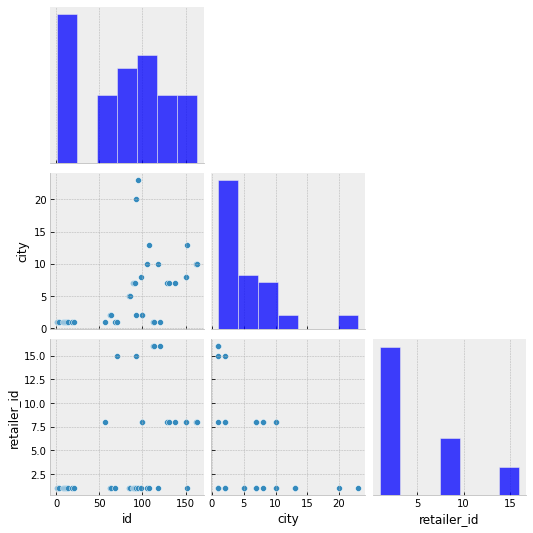

In [34]:
# Взаимоотношения между переменными 
sns.pairplot(data = stores, corner=True)

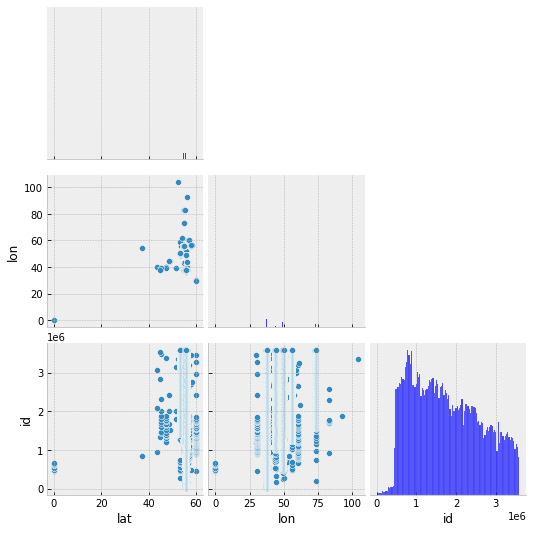

In [35]:
# Взаимоотношения между переменными 
sns.pairplot(data = addresses, corner=True)

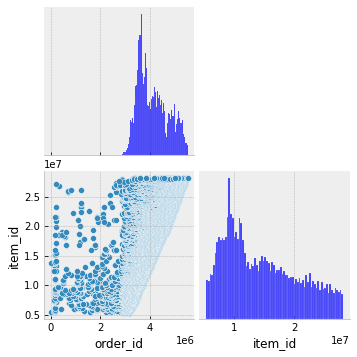

In [36]:
# Взаимоотношения между переменными 
sns.pairplot(data = replacements, corner=True)

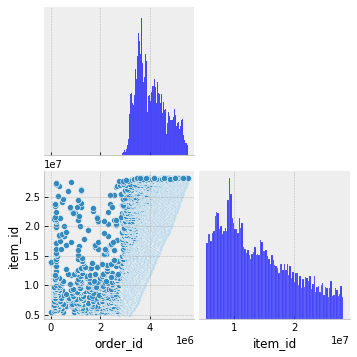

In [37]:
# Взаимоотношения между переменными 
sns.pairplot(data = cancellations, corner=True)

### _Time Series Analysis_

---

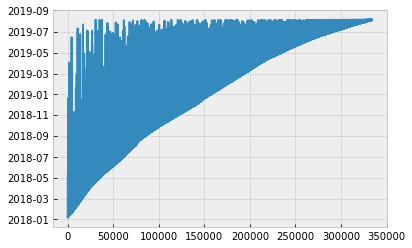

In [38]:
plt.plot(orders['shipped_at'])

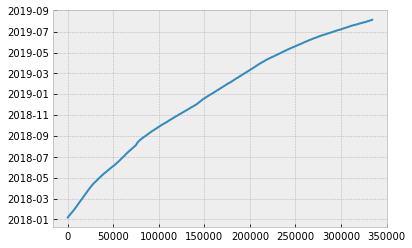

In [39]:
plt.plot(orders['created_at'])

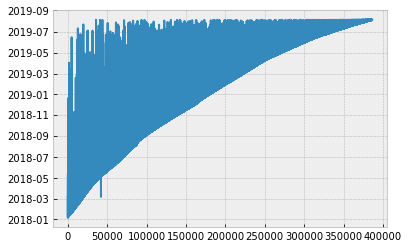

In [40]:
plt.plot(delivery_windows['starts_at'])

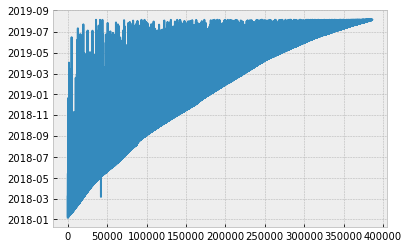

In [41]:
plt.plot(delivery_windows['ends_at'])

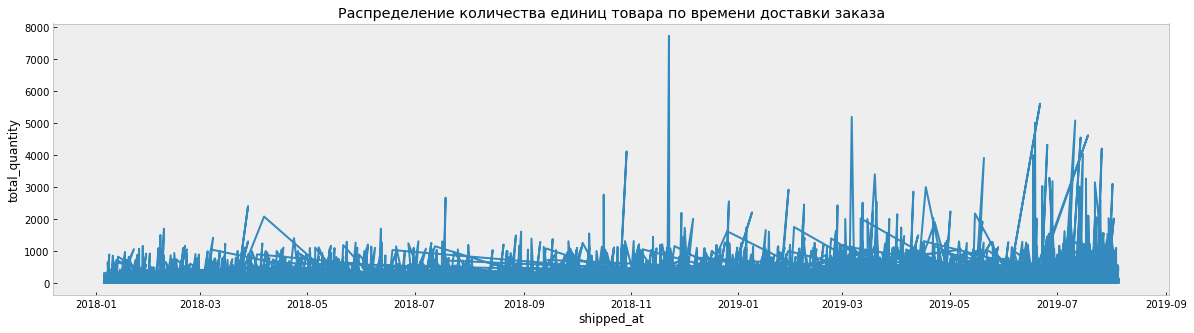

In [42]:
# Распределение количества единиц товара по времени доставки заказа 
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(orders['shipped_at'], orders['total_quantity'])

ax.set(xlabel='shipped_at', ylabel='total_quantity',
       title='Распределение количества единиц товара по времени доставки заказа')
ax.grid()
plt.show()

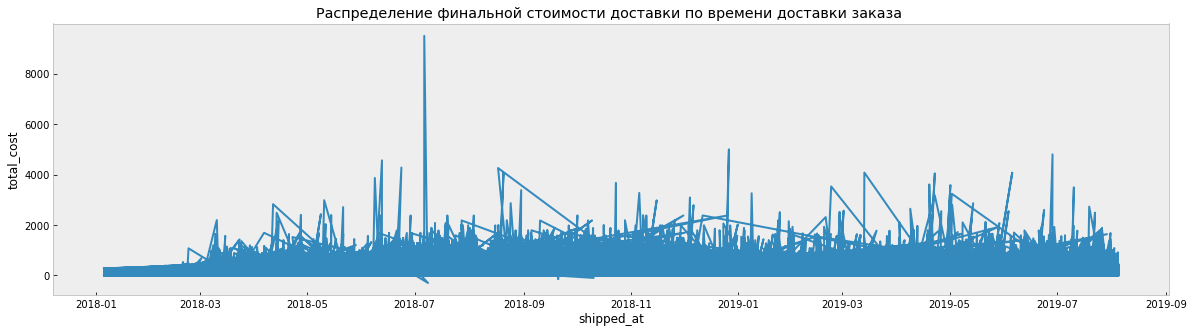

In [43]:
# Распределение финальной стоимости доставки по времени доставки заказа 
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(orders['shipped_at'], orders['total_cost'])

ax.set(xlabel='shipped_at', ylabel='total_cost',
       title='Распределение финальной стоимости доставки по времени доставки заказа ')
ax.grid()
plt.show()

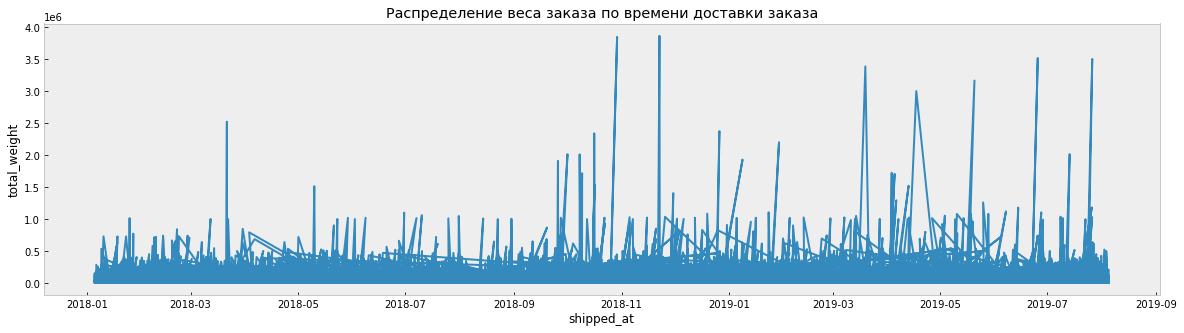

In [44]:
# Распределение веса заказа по времени доставки заказа 
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(orders['shipped_at'], orders['total_weight'])

ax.set(xlabel='shipped_at', ylabel='total_weight',
       title='Распределение веса заказа по времени доставки заказа')
ax.grid()
plt.show()

<AxesSubplot:xlabel='lon', ylabel='lat'>

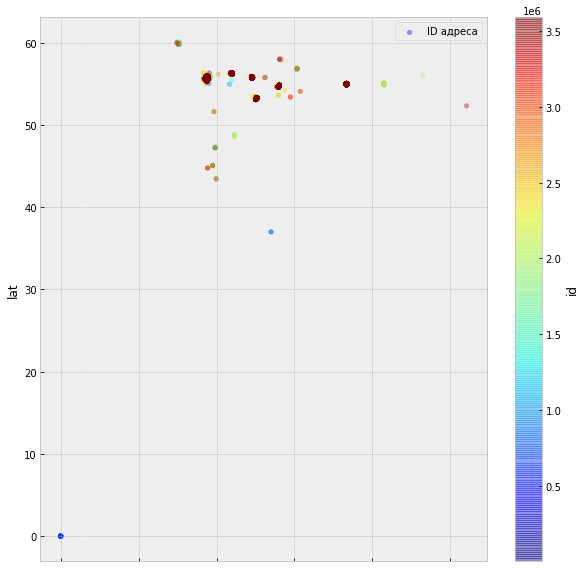

In [45]:
addresses.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='id', cmap=plt.get_cmap('jet'), colorbar=True, label='ID адреса')